In [6]:
import pandas as pd
import numpy as np

from gensim.models import KeyedVectors

In [7]:
word_vectors = KeyedVectors.load_word2vec_format('trmodel_truncated', binary=True)

In [13]:
# test
word_vectors.get_vector('test')

array([ 3.6752343 ,  3.5727208 ,  0.58854115,  1.3014932 ,  0.9988798 ,
        1.875416  , -1.5055971 ,  6.556562  ,  0.84857816,  3.963331  ,
        2.3502285 ,  2.2571442 ,  4.4195943 , -2.155676  ,  0.64765775,
       -2.1940875 ,  2.7437816 ,  3.50094   , -0.25286156, -0.43737125,
        0.3856713 ,  1.7983892 ,  0.17250548,  2.685323  ,  0.08131203,
        2.6644003 ,  2.7006814 ,  0.13602364,  2.293689  ,  0.7282618 ,
        1.8219929 ,  3.7741597 ,  5.828385  ,  0.15540688,  4.793951  ,
        0.5971337 ,  1.5521104 ,  1.7742623 , -0.2929796 , -0.70113754],
      dtype=float32)

In [47]:
def cosine_similarity(vec1, vec2):
    if vec1 is None or vec2 is None:
        return 0.0
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [55]:
# test
w = word_vectors.get_vector('test')
y = word_vectors.get_vector('testi')

cs = cosine_similarity(w,y)
cs

0.7878671

In [98]:
x = word_vectors.get_vector('ayakkabıcı')
y = word_vectors.get_vector('ayakkabı')
print(cosine_similarity(x,y))

0.82929575


In [116]:
def root_dict(word):
    l = len(word)
    word_vec = word_vectors.get_vector(word)
    dict = {}
    for _ in range(l):
        word = word[:-1]
        try:
            pred_vec = word_vectors.get_vector(word)
        except Exception as e:
            pred_vec = None
        
        cs = cosine_similarity(word_vec, pred_vec)
        dict[word] = cs
        
    return dict 

In [135]:
import matplotlib.pyplot as plt

def root_plot(data):
    keys = list(data.keys())
    values = list(data.values())

    plt.plot(keys, values, 'bo-')
    plt.xticks(rotation=45)

    for i, value in enumerate(values):
        if value != 0:
            plt.text(keys[i], value, f'{value:.10f}', ha='center', va='bottom', rotation=30)

    plt.show()

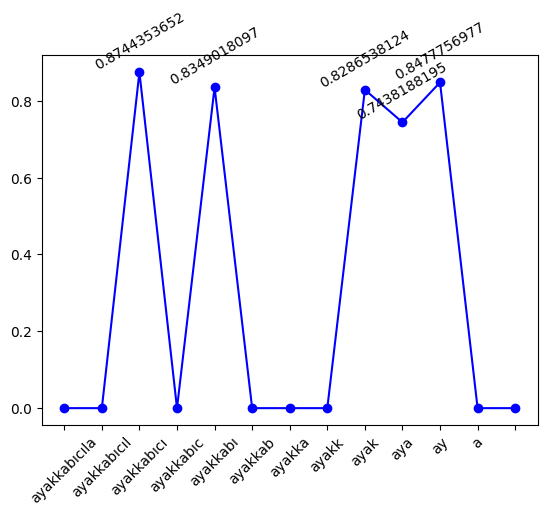

In [136]:
# test
test = root_dict('ayakkabıcılar')
root_plot(test)